In [5]:
import cv2

In [7]:
import matplotlib.pyplot as plt

In [8]:

# Loading pretrained object detection file
frozen_model = 'frozen_inference_graph.pb'

# 
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'

In [9]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [13]:
classLabels = []

# Read the labels file adn separate out each label into a separate index
file_name = 'Labels.txt'
with open(file_name, 'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')


In [66]:
print(len(classLabels))
print(classLabels)

80
['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [25]:
#Resizes input image to 320x320 pixels for the model
model.setInputSize(320,320)
# Normlize the image pixel values
model.setInputScale(1.0/127.5) # 255/2 = 127.5

model.setInputMean((127.5,127.5,127.5)) # mobilenet => [-1,1]

# Opencv uses BGR by default but most models expect RGB
model.setInputSwapRB(True)

< cv2.dnn.Model 000001EA24B1E8B0>

In [47]:
img= cv2.imread('carExample.png')

In [71]:
# Detect labels in the image using the model if there is a confidence threshold above 0.5
# ClassIndex refers to the CLass ID of the detected objects, confidence stores the confidence score, bbox is for the bounding boxes around the object
ClassIndex, confidence, bbox = model.detect(img, confThreshold = 0.5)

In [51]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
# Uterator over the detected objects
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(),bbox):
    # Draw the rectangle around the detected object from the bbox parameter
    cv2.rectangle(img,boxes,(255,0,0),2)
    # Write the class label on the bbox
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0] + 10, boxes[1] + 40), font, fontScale = font_scale, color = (0,255,0), thickness = 3)

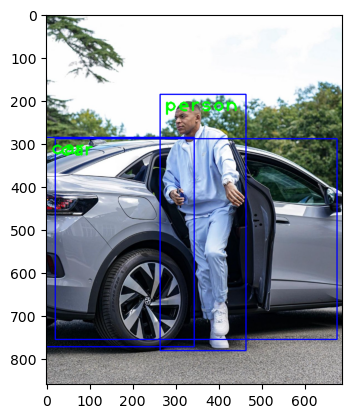

In [53]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

# Webcam Demonstration

In [69]:
# Access the webcam
cap = cv2.VideoCapture(1)

# Chekc if the webcame opened
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
        raise IOError("Cannot open webcam")

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

# Loop to continously classify objets
while True:
    # Read a frame
    ret,frame = cap.read()
    
    ClassIndex, confidence, bbox = model.detect(frame, confThreshold = 0.55)

    # If there is ab object detected, it loops over the detection in the frame
    if (len(ClassIndex) !=0):

        
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            # Ensure objects detected is within the 80 labels
            if (ClassInd <= 80):
                # Draw rectangle and label the object
                cv2.rectangle(frame,boxes, (255,0,0), 2)
                cv2.putText(frame,classLabels[ClassInd-1],(boxes[0] + 10, boxes[1] + 40), font, fontScale = font_scale, color = (0,255,0), thickness = 3)
        
        cv2.imshow('Webcam Demo', frame)

    # stop the feed if the q key is pressed
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

# release and close all opencv windows
cap.release()
cv2.destroyAllWindows()